# Importar Datos

In [1]:
clear()

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_ori = pd.read_csv('bank-additional-full_sep.csv', sep = ',')
train_ori.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#conteo de datos
train_ori.shape

(41188, 21)

In [5]:
train = train_ori

# ANALISIS EXPLORATORIO

# Descripcion Rapida 

In [6]:
#estadística descriptiva
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [8]:
#conteo de nulos
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Identificar Variables

In [9]:
features = list(train.columns.drop('y'))
features

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

## Variables Numericas

In [10]:
#características numéricas
features_num = list(train.describe().columns)
features_num

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

## Variables Categoricas

In [11]:
#características categóricas
features_cat = list(train[features].drop(features_num, axis=1).columns)
features_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [12]:
#distribución de las variables categóricas
for feature in features_cat:
    print("-------------------------------------------------------------------------------")
    print(train.groupby(feature, axis = 0)[feature].count().sort_values(ascending = False))

-------------------------------------------------------------------------------
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
-------------------------------------------------------------------------------
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
-------------------------------------------------------------------------------
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------------------------------------------

### Variables Nominales

In [13]:
#Seleccionar variables categoricas nominales:
features_cat_nom = [ 'job',
                     'marital',
                     'default',
                     'housing',
                     'loan',
                     'contact',
                     'month',
                     'day_of_week',
                     'poutcome']

### Variables Ordinales

In [14]:
#Seleccionar variables categoricas ordinales:
features_cat_ord = ['education']

# Visualizacion de Datos

## Variables Numericas

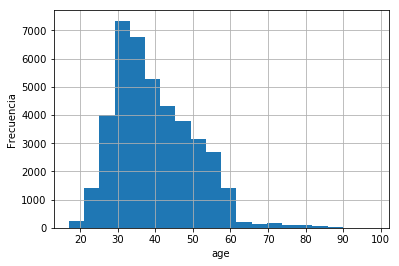

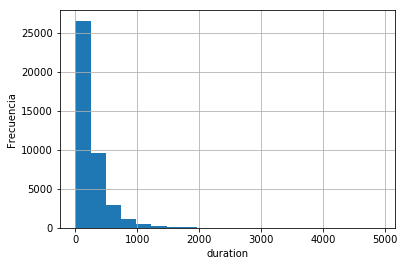

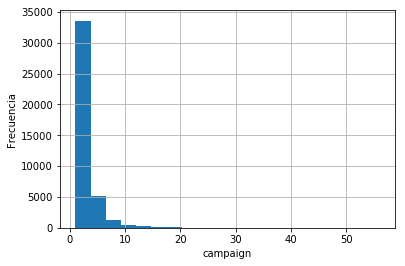

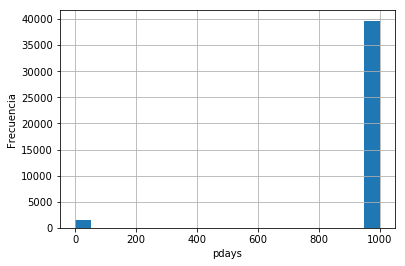

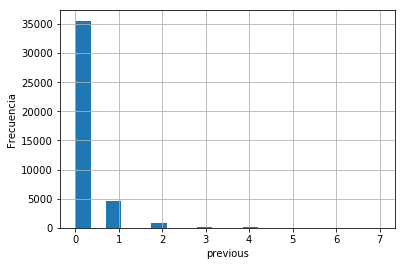

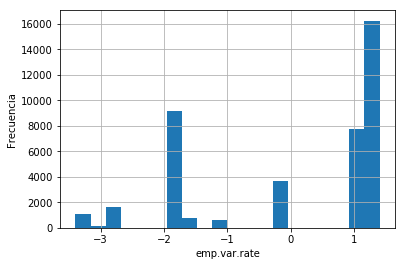

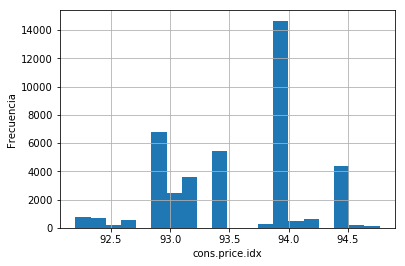

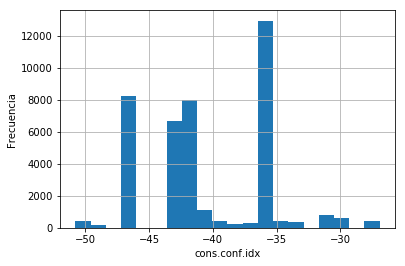

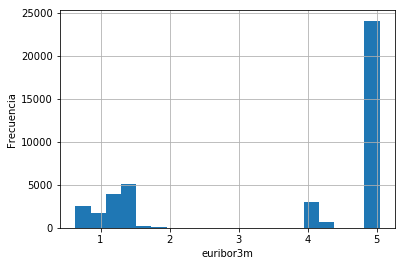

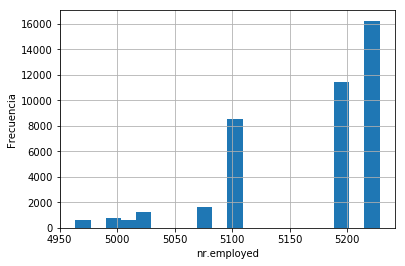

In [15]:
import matplotlib.pyplot as plt
for feature in features_num:
    train[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()

## Variables Categoricas

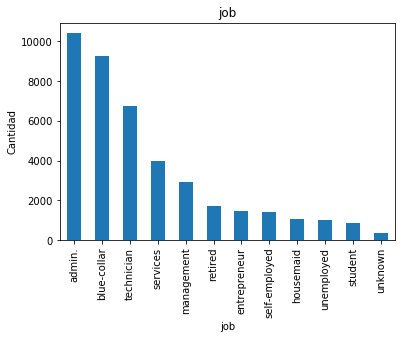

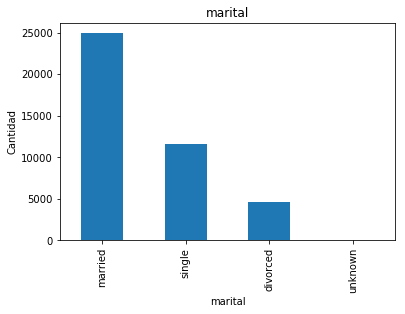

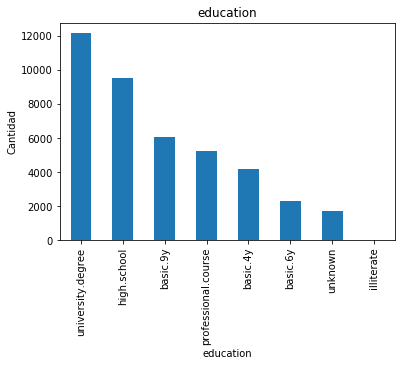

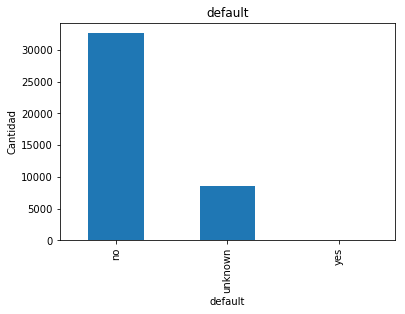

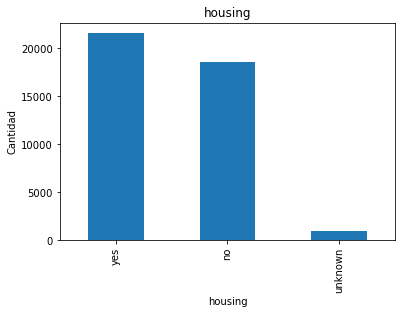

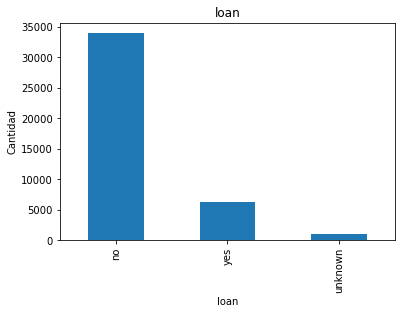

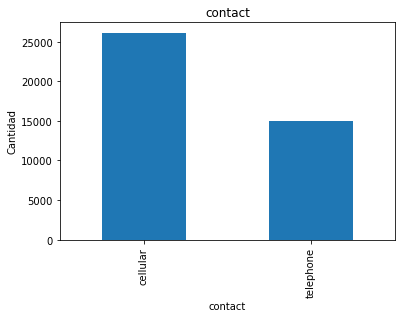

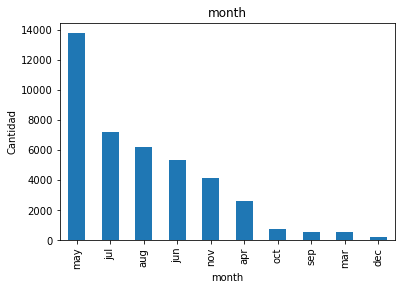

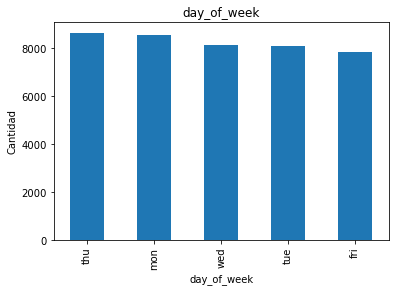

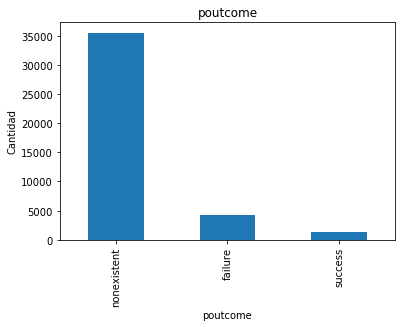

In [16]:
#Visualizacion Variables Categoricas
import matplotlib.pyplot as plt
for feature in features_cat:
    var = train.groupby(feature)[feature].count().sort_values(ascending = False)
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Cantidad')
    ax1.set_title(feature)
    var.plot(kind='bar')
    plt.show()

## Variables vs Target

In [17]:
# separar
yes = train[train.y == 'yes']
yes.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [18]:
# separar
no = train[train.y == 'no']
no.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Variables Numericas

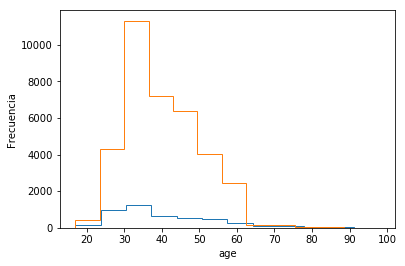

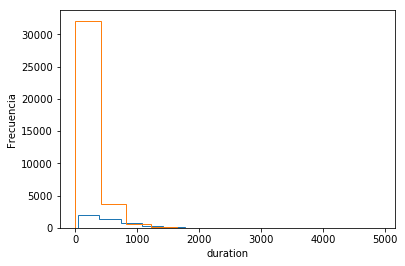

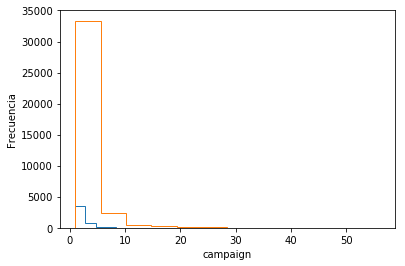

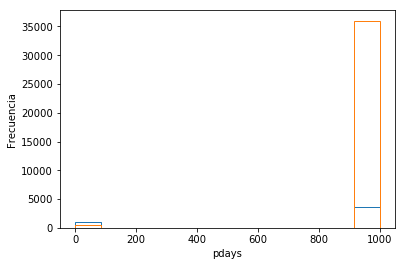

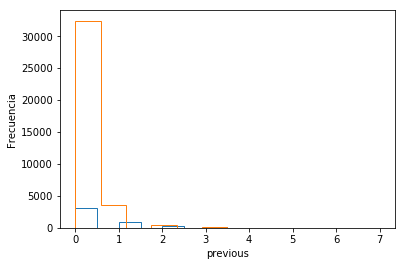

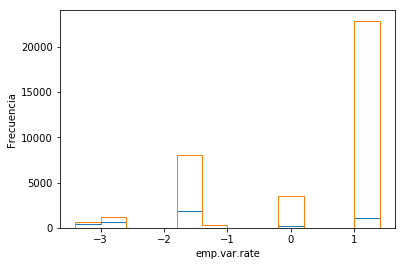

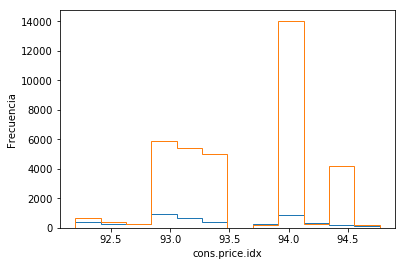

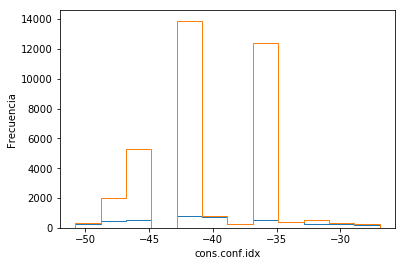

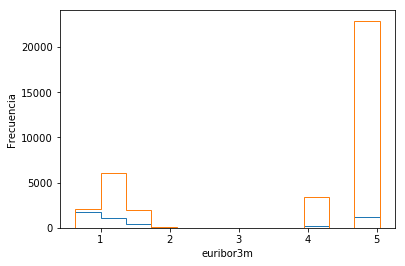

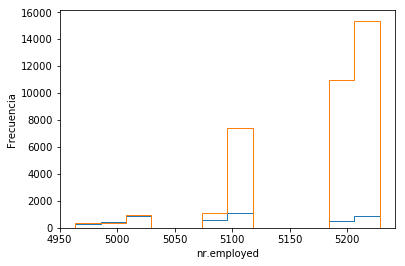

In [19]:
import matplotlib.pyplot as plt
for feature in features_num:
    #plt.figure(figsize=(10, 8))
    plt.hist(yes[feature], 12, facecolor='blue', label='yes', histtype='step')
    plt.hist(no[feature], 12, facecolor='red', label='no', histtype='step')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()

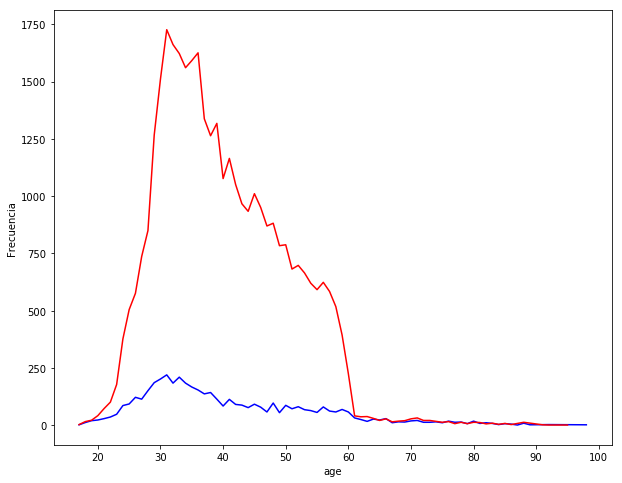

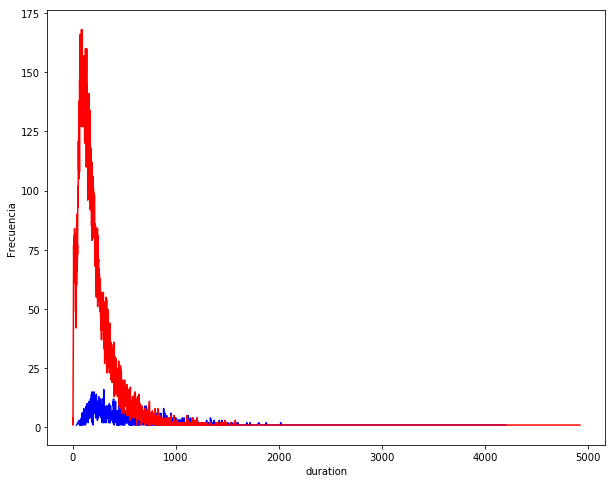

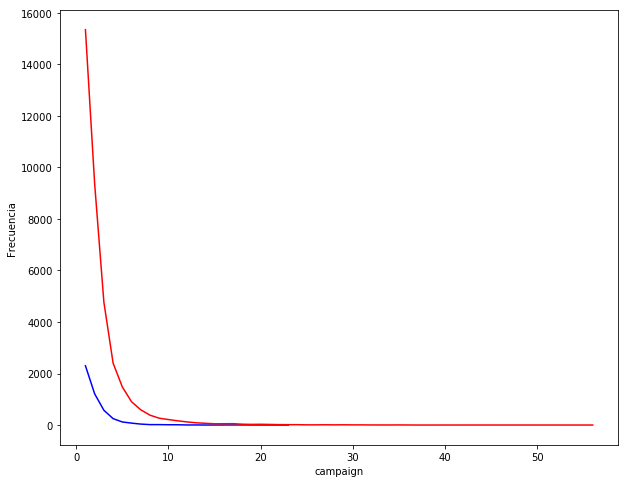

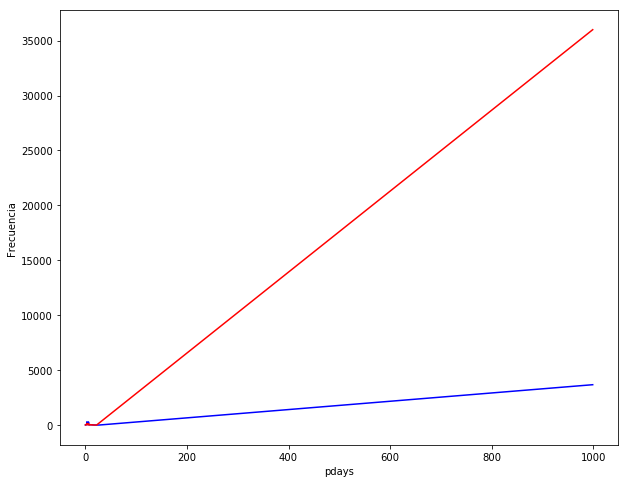

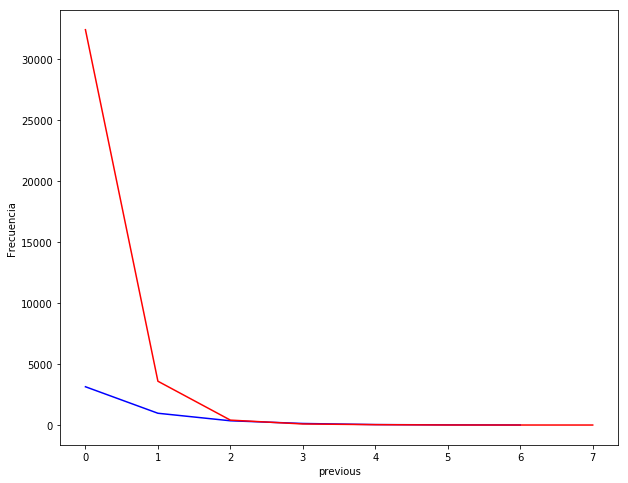

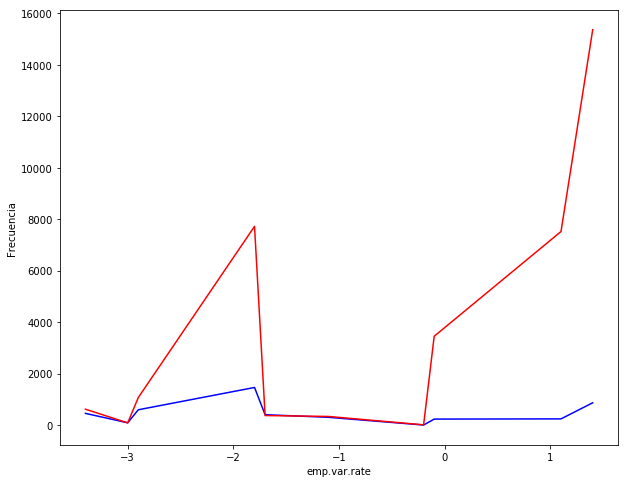

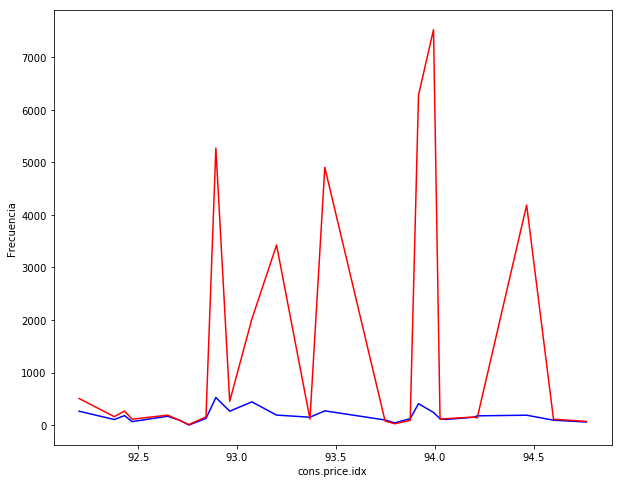

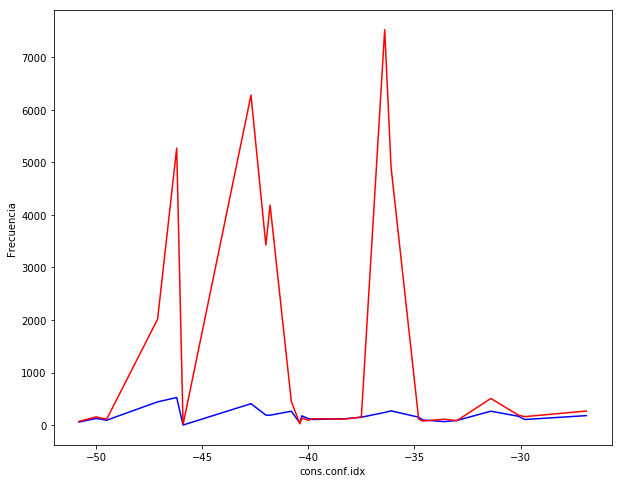

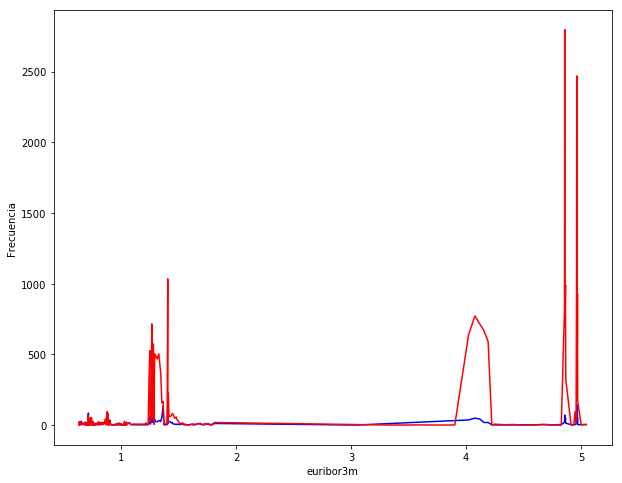

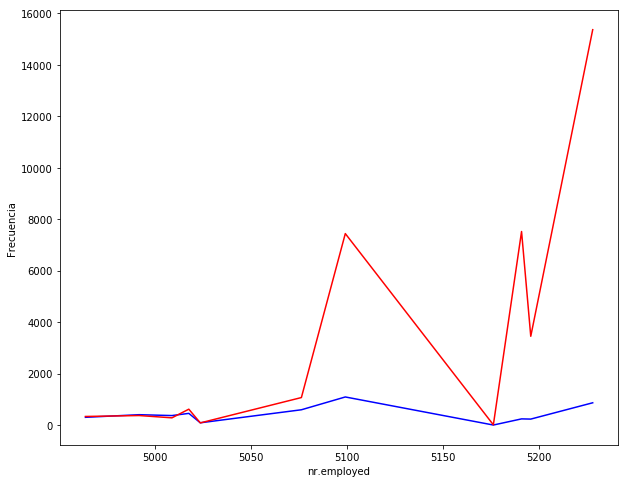

In [20]:
import matplotlib.pyplot as plt
for feature in features_num:
    plt.figure(figsize=(10, 8))
    i=pd.Series(yes[feature].unique()).sort_values()
    f=yes.groupby(feature)['y'].count()
    plt.plot(i,f,'b')
    i=pd.Series(no[feature].unique()).sort_values()
    f=no.groupby(feature)['y'].count()
    plt.plot(i,f,'r')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()

### Variables Categoricas

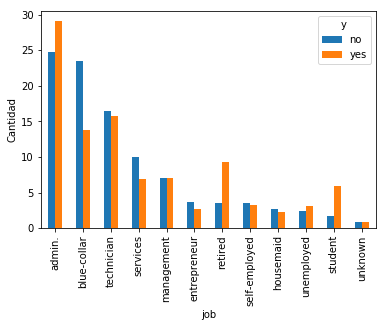

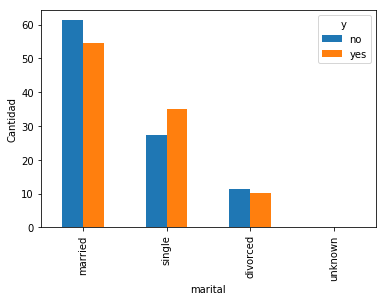

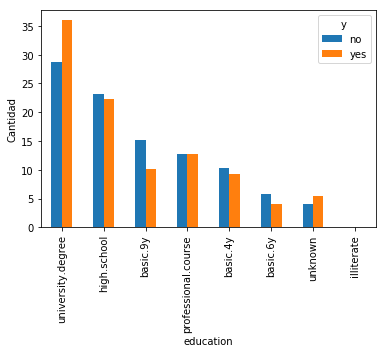

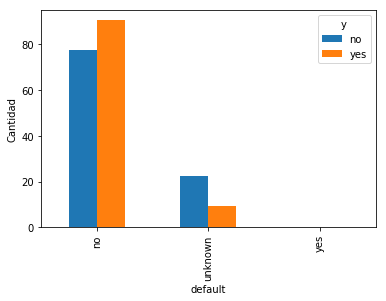

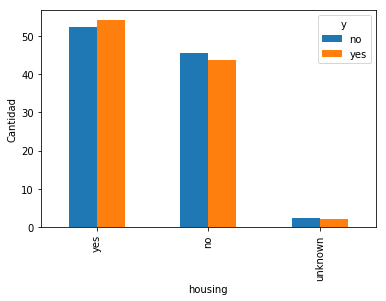

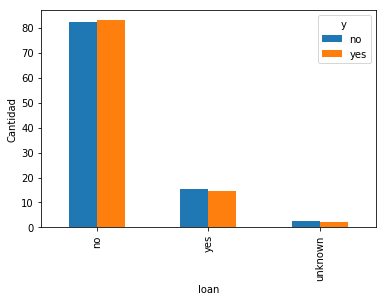

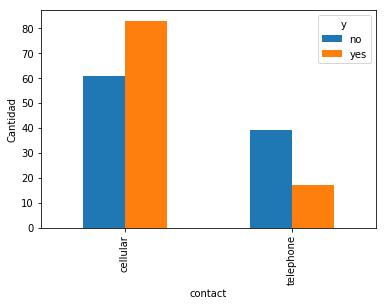

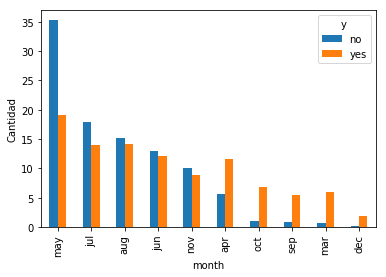

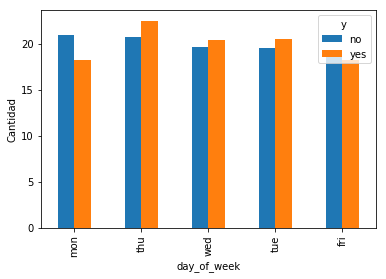

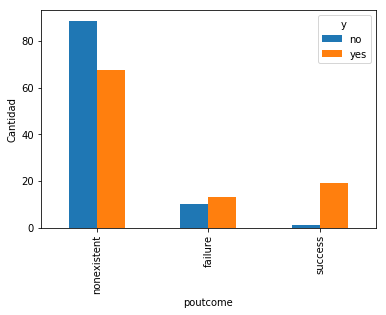

In [21]:
import matplotlib.pyplot as plt
for feature in features_cat:
    var = pd.crosstab(index=train[feature], columns=train['y']).apply(lambda r: r/r.sum()*100,axis=0).sort_values('no',ascending = False)
    var.plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Cantidad')
    plt.show()

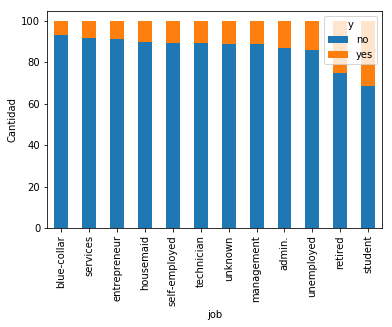

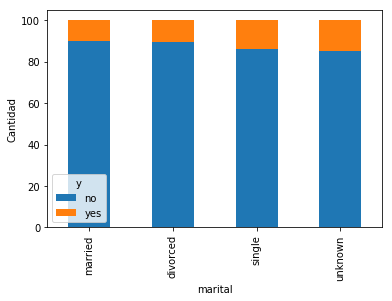

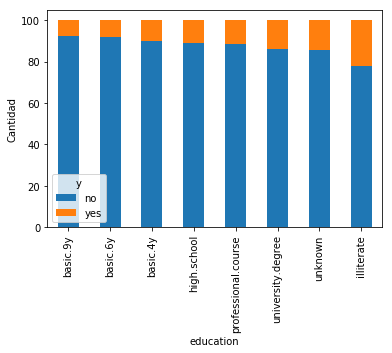

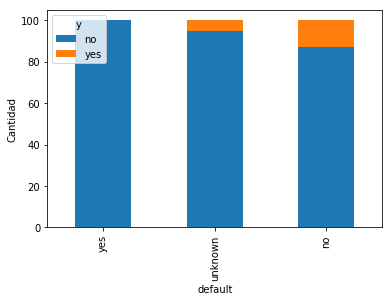

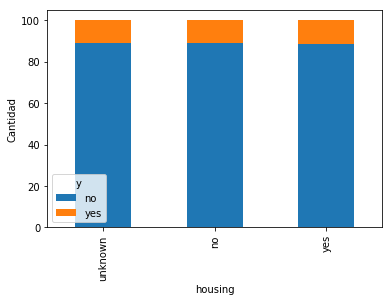

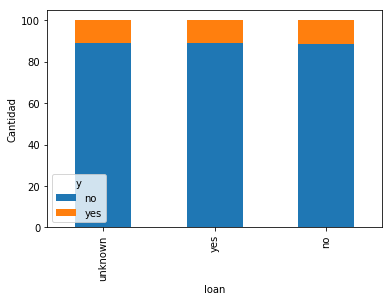

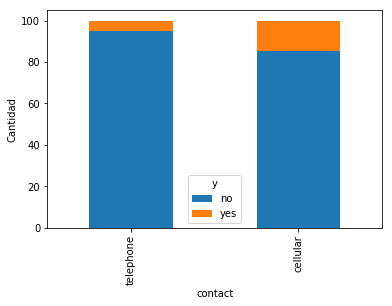

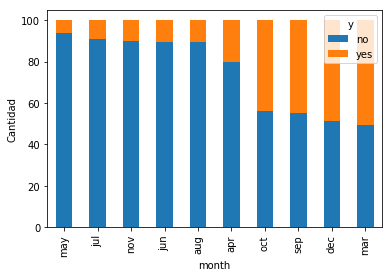

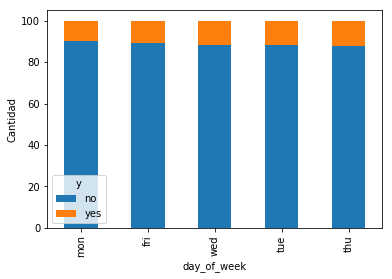

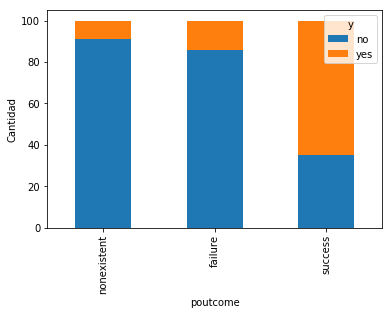

In [22]:
import matplotlib.pyplot as plt
for feature in features_cat:
    var = pd.crosstab(index=train[feature], columns=train['y']).apply(lambda r: r/r.sum()*100,axis=1).sort_values('no',ascending = False)
    var.plot(kind='bar', stacked = True)
    plt.xlabel(feature)
    plt.ylabel('Cantidad')
    plt.show()

import matplotlib as mpl
import seaborn as sns
cmap = mpl.colors.ListedColormap(sns.color_palette("hls", 3))

# diagrama de dispersión

for feature in features_f:
    for feature2 in features_f:
        plt.scatter(train[feature], train[feature2], c=y_train, cmap=cmap)
        plt.xlabel(feature)
        plt.ylabel(feature2)
        plt.show()

# PREPARACION DE DATOS

# Eliminación de Valores Nulos

In [23]:
#conteo de nulos
nulos = pd.DataFrame(train[features].isnull().sum(), columns = ['cantidad'])
nulos.head()

,cantidad
age,0
job,0
marital,0
education,0
default,0


In [24]:
features_na = list(nulos[nulos['cantidad']>0].index)
features_na

[]

features_na = ['age',
               'duration',
               'campaign']

In [25]:
## Media
for feature in features_na:
    train[feature].fillna(data[feature].mean(), inplace=True)

In [26]:
## Mediana
for feature in features_na:
    train[feature].fillna(data[feature].median(), inplace=True)

In [27]:
## Moda
from scipy.stats import mode
for feature in features_na:
    train[feature].fillna(mode(data[feature]).mode[0], inplace=True)

# Eliminación de Valores Extremos

## Diagrama de Cajas

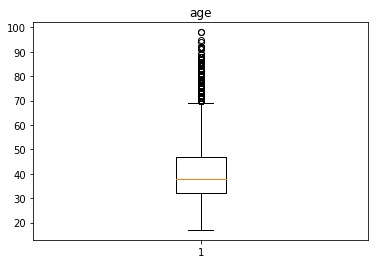

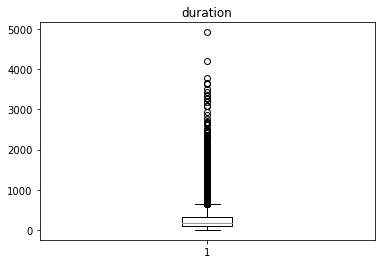

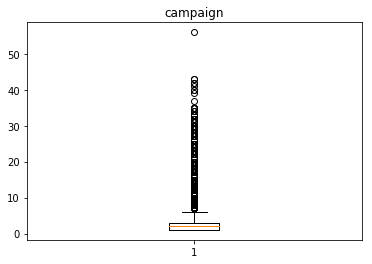

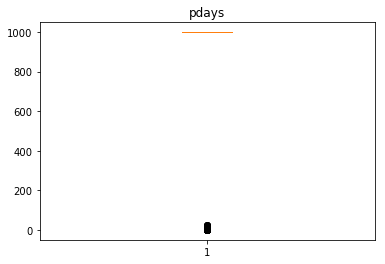

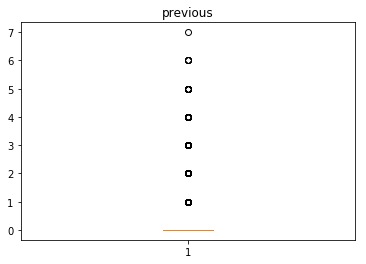

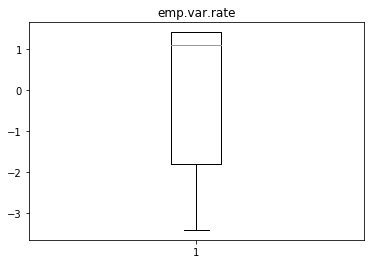

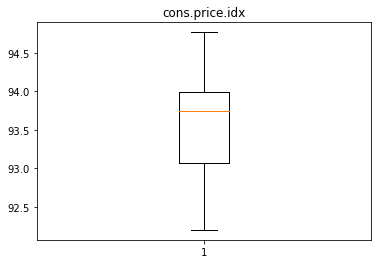

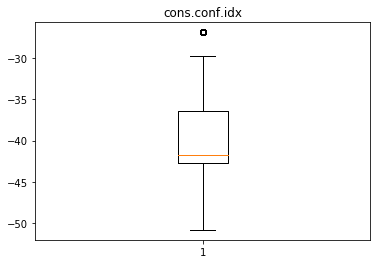

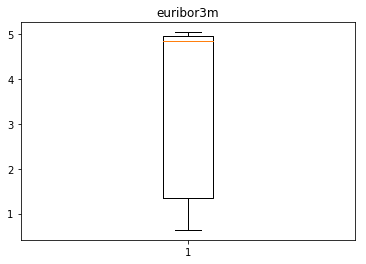

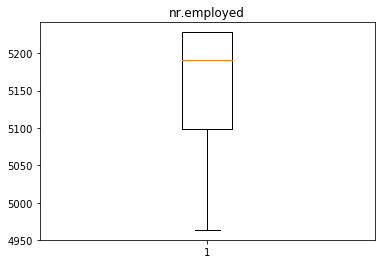

In [28]:
import matplotlib.pyplot as plt
for feature in features_num:
    plt.boxplot(train[feature])
    plt.title(feature)
    plt.show()

In [29]:
features_num_outliers = ['age',
                         'duration',
                         'campaign']

In [30]:
#Valores extremos edad
for feature in features_num_outliers:
    train.loc[train[feature] > int(train[feature].quantile([.75]))+0.5*(int(train[feature].quantile([.75]))-int(train[feature].quantile([.25]))),feature]=int(train[feature].quantile([.75]))

In [31]:
#Valores extremos edad
for feature in features_num_outliers:
    train.loc[train[feature] < int(train[feature].quantile([.25]))-0.5*(int(train[feature].quantile([.75]))-int(train[feature].quantile([.25]))),feature]=int(train[feature].quantile([.25]))

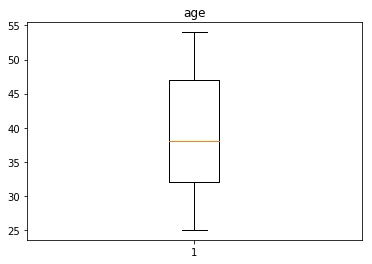

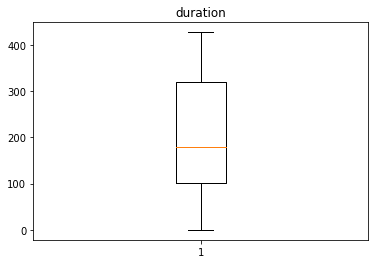

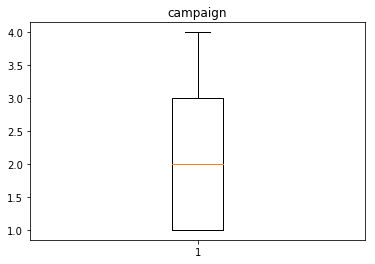

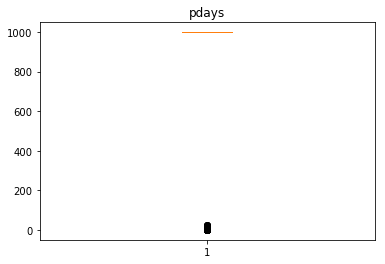

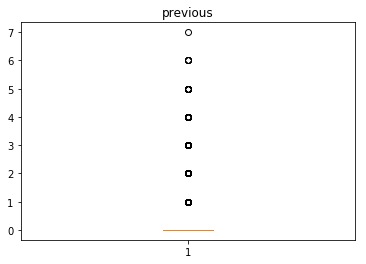

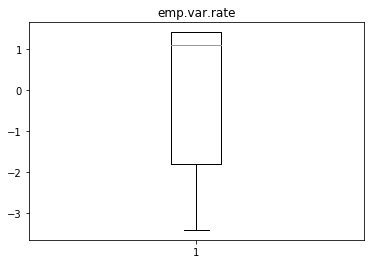

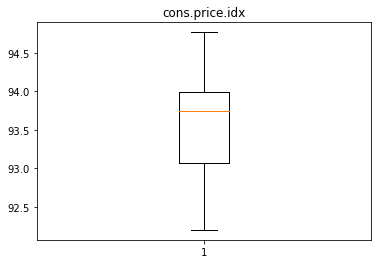

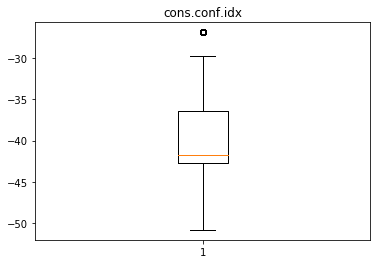

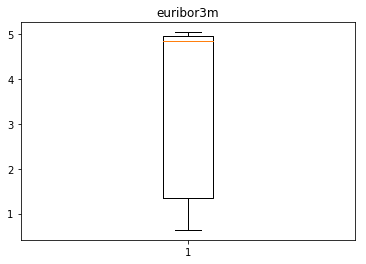

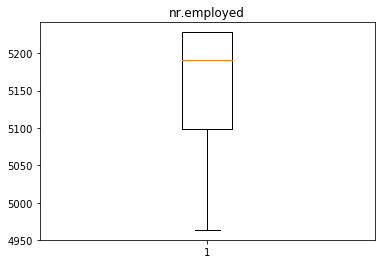

In [32]:
for feature in features_num:
    plt.boxplot(train[feature])
    plt.title(feature)
    plt.show()

# Categoricos a numericos

## Nominales a Dummies

In [33]:
#transformación de las variables categóricas a dummies
for feature in features_cat_nom:
    dummies = pd.get_dummies(train[feature], prefix=feature)
    train = pd.concat([train, dummies], axis=1)

## Ordinales a Dummies

In [34]:
list(train['education'].unique())

['basic.4y',
 'high.school',
 'basic.6y',
 'basic.9y',
 'professional.course',
 'unknown',
 'university.degree',
 'illiterate']

In [35]:
for feature in features_cat_ord:
    print("-------------------------------------------------------------------------------")
    print(train.groupby(feature, axis = 0)[feature].count().sort_values(ascending = False))

-------------------------------------------------------------------------------
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


In [36]:
train['education_num'] = train.education.map(
                          {'unknown':-1, 
                           'illiterate':0,
                           'basic.4y':1,
                           'basic.6y':2,
                           'basic.9y':3,
                           'high.school':4,
                           'university.degree':5,
                           'professional.course':6,
                          }
                      )
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,education_num
0,47,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,1,0,0,0,0,1,0,1
1,47,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,1,0,0,0,0,1,0,4
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,1,0,0,0,0,1,0,4
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,1,0,0,0,0,1,0,2
4,47,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,1,0,0,0,0,1,0,4


## Aplicar One Hot Encoding para Variables Categoricas
from sklearn.preprocessing import LabelEncoder
for var in features_cat_ord:
    var_new = var + "_num"
    le = LabelEncoder()
    lista = train[var]
    le.fit(lista)
    train[var_new] = le.transform(train[var])
train.head()    

# Dataset Pre-Final

In [37]:
#selección de características
features_pf = list(train.describe().columns)
features_pf

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'education_num']

In [38]:
#creación del target
train['target'] = train['y'].map({'no':0, 'yes':1})
train['target'].unique()

array([0, 1], dtype=int64)

## Creación de dataset y target

In [39]:
#características y target
X = train[features_pf]
y = train['target']

In [40]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,education_num
0,47,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,1
1,47,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,4
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,4
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,2
4,47,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,4


In [41]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## Data train y test

In [284]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.70, random_state=999)
print(len(X_train), len(y_train), len(X_test), len(y_test))

28831 28831 12357 12357


# X_train = X
y_train = y
len(X), len(y)

# Balanceo

## Undersampling Random

def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

from time import time
time_star = time()

X_u, y_u = UnderSampling(X_train, y_train, target_percentage=0.5)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

X_balanced = pd.DataFrame(X_u, columns=features_pf)
X_balanced.head()

y_balanced = pd.Series(y_u)
y_balanced.head()

len(X_balanced), len(y_balanced)

## Oversampling Random

import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X.ix[filter_], y.ix[filter_]

from time import time
time_star = time()

X_u, y_u = OverSampling(X_train, y_train, target_percentage=0.5)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

X_balanced = pd.DataFrame(X_u, columns=features_pf)
X_balanced.head()

y_balanced = pd.Series(y_u)
y_balanced.head()

len(X_balanced), len(y_balanced)

## Smote

In [285]:
n_samples_0 = (y_train == 0).sum()
n_samples_1 = (y_train == 1).sum()

In [286]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

In [287]:
from time import time
time_star = time()

X_u, y_u = SMOTE(X_train.values, y_train.values, target_percentage=0.5, k=5, seed=999)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Time:  2.11  minutes


In [288]:
X_balanced = pd.DataFrame(X_u, columns=features_pf)
X_balanced.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,education_num
0,48.0,76.0,2.0,999.0,0.0,1.4,93.444,-36.1,4.964,5228.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
1,29.0,319.0,1.0,999.0,0.0,1.4,93.444,-36.1,4.964,5228.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0
2,32.0,65.0,1.0,999.0,2.0,-2.9,92.201,-31.4,0.825,5076.2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
3,45.0,17.0,3.0,999.0,0.0,1.4,93.444,-36.1,4.963,5228.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
4,36.0,319.0,1.0,999.0,0.0,1.4,94.465,-41.8,4.961,5228.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0


In [289]:
y_balanced = pd.Series(y_u)
y_balanced.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [290]:
len(X_balanced), len(y_balanced)

(51138, 51138)

# Seleccion de Variables

In [291]:
X_selection = X_balanced
y_selection = y_balanced

In [292]:
seeds = np.arange(0,501,50)
seeds

array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

## RandomForestClassifier

In [293]:
from time import time
time_star = time()

temp = pd.DataFrame({'atributo':list(X_selection.columns)})
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
for seed in seeds:
    clf = RandomForestClassifier(random_state=seed)
    clf = clf.fit(X_selection, y_selection)
    semilla = 'semilla_' + str(seed)
    temp[semilla]=clf.feature_importances_
temp['importancia'] = temp.ix[:,1:].apply(np.mean, axis=1)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Time:  0.18  minutes


In [294]:
ranking_features = temp[['atributo','importancia']].sort_values('importancia', ascending = False).reset_index(drop = True)
ranking_features.head(17)

,atributo,importancia
0,duration,0.159721
1,euribor3m,0.071743
2,nr.employed,0.057107
3,emp.var.rate,0.052722
4,marital_single,0.048633
5,marital_married,0.047578
6,day_of_week_thu,0.039395
7,day_of_week_wed,0.038219
8,pdays,0.033372
9,month_may,0.033227


In [297]:
from sklearn import metrics as mt
from sklearn.ensemble import RandomForestClassifier
#n_features  = len(ranking_features)
array_n_feactures = list(range(1,len(ranking_features)))
array_n_estimators = []
array_predictions = []

new_importance_variable = ranking_features.ix[:,0]
data_train = X_selection

data_test = X_test

array_auc = []

for n_features in array_n_feactures:
    forest = RandomForestClassifier(n_estimators = 100, random_state = 100, n_jobs = 3)
    X_train_run = data_train.ix[:, new_importance_variable[:n_features]]
    y_train_run = y_selection

    X_test_run = data_test.ix[:, new_importance_variable[:n_features]]
    y_test_run = y_test
    
    forest = forest.fit(X_train_run, y_train_run)
    y_pred = forest.predict(X_test_run)
    y_pred_proba = forest.predict_proba(X_test_run)
    
    accuracy = mt.accuracy_score(y_test_run.astype('int'),y_pred.astype('int'))
    auc = mt.roc_auc_score(y_test_run.astype('int'),y_pred_proba[:,1])
    print (n_features,"- Accuracy : ", round(accuracy*100,3))
    print ("    AUC - ROC: ",round(auc*100,3))
    
    array_n_estimators.append(n_features)
    array_predictions.append(round(accuracy*100,3))
    array_auc.append(round(auc*100,3))

1 - Accuracy :  84.867
    AUC - ROC:  79.899
2 - Accuracy :  89.018
    AUC - ROC:  90.735
3 - Accuracy :  89.261
    AUC - ROC:  91.217
4 - Accuracy :  89.261
    AUC - ROC:  90.978
5 - Accuracy :  89.609
    AUC - ROC:  90.798
6 - Accuracy :  89.374
    AUC - ROC:  90.601
7 - Accuracy :  89.585
    AUC - ROC:  90.889
8 - Accuracy :  89.512
    AUC - ROC:  90.891
9 - Accuracy :  89.957
    AUC - ROC:  91.34
10 - Accuracy :  90.03
    AUC - ROC:  91.218
11 - Accuracy :  89.981
    AUC - ROC:  91.276
12 - Accuracy :  90.006
    AUC - ROC:  91.306
13 - Accuracy :  90.184
    AUC - ROC:  91.392
14 - Accuracy :  90.062
    AUC - ROC:  91.718
15 - Accuracy :  89.722
    AUC - ROC:  91.093
16 - Accuracy :  89.779
    AUC - ROC:  91.217
17 - Accuracy :  89.698
    AUC - ROC:  91.243
18 - Accuracy :  89.763
    AUC - ROC:  90.999


KeyboardInterrupt: 

## ExtraTreesClassifier

In [298]:
from time import time
time_star = time()

temp = pd.DataFrame({'atributo':list(X_selection.columns)})
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
for seed in seeds:
    clf = ExtraTreesClassifier(random_state=seed)
    clf = clf.fit(X_selection, y_selection)
    semilla = 'semilla_' + str(seed)
    temp[semilla]=clf.feature_importances_
temp['importancia'] = temp.ix[:,1:].apply(np.mean, axis=1)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Time:  0.18  minutes


In [299]:
ranking_features = temp[['atributo','importancia']].sort_values('importancia', ascending = False).reset_index(drop = True)
ranking_features.head(17)

,atributo,importancia
0,duration,0.128810
1,euribor3m,0.063011
2,emp.var.rate,0.053219
3,month_may,0.046495
4,nr.employed,0.037139
5,day_of_week_wed,0.036673
6,marital_single,0.035940
7,day_of_week_thu,0.032396
8,contact_cellular,0.028819
9,marital_married,0.028767


In [302]:
from sklearn import metrics as mt
from sklearn.ensemble import ExtraTreesClassifier
#n_features  = len(ranking_features)
array_n_feactures = list(range(1,len(ranking_features)))
array_n_estimators = []
array_predictions = []

new_importance_variable = ranking_features.ix[:,0]
data_train = X_selection

data_test = X_test

array_auc = []

for n_features in array_n_feactures:
    forest = ExtraTreesClassifier(n_estimators = 100, random_state = 100, n_jobs = 3)
    X_train_run = data_train.ix[:, new_importance_variable[:n_features]]
    y_train_run = y_selection

    X_test_run = data_test.ix[:, new_importance_variable[:n_features]]
    y_test_run = y_test
    
    forest = forest.fit(X_train_run, y_train_run)
    y_pred = forest.predict(X_test_run)
    y_pred_proba = forest.predict_proba(X_test_run)
    
    accuracy = mt.accuracy_score(y_test_run.astype('int'),y_pred.astype('int'))
    auc = mt.roc_auc_score(y_test_run.astype('int'),y_pred_proba[:,1])
    print (n_features,"- Accuracy : ", round(accuracy*100,3))
    print ("    AUC - ROC: ",round(auc*100,3))
    
    array_n_estimators.append(n_features)
    array_predictions.append(round(accuracy*100,3))
    array_auc.append(round(auc*100,3))

1 - Accuracy :  84.867
    AUC - ROC:  79.913
2 - Accuracy :  88.848
    AUC - ROC:  88.554
3 - Accuracy :  89.245
    AUC - ROC:  89.157
4 - Accuracy :  89.091
    AUC - ROC:  89.032
5 - Accuracy :  89.124
    AUC - ROC:  89.043
6 - Accuracy :  89.31
    AUC - ROC:  89.106
7 - Accuracy :  89.439
    AUC - ROC:  88.501
8 - Accuracy :  89.399
    AUC - ROC:  88.421
9 - Accuracy :  89.512
    AUC - ROC:  88.518
10 - Accuracy :  89.488
    AUC - ROC:  88.243
11 - Accuracy :  89.909
    AUC - ROC:  88.713


KeyboardInterrupt: 

In [ ]:
features_sel = ['',
                '',
                '',
                '',
                '']

# CONSTRUCCION Y EVALUACION DEL MODELO

# Adaboost

In [251]:
from sklearn.ensemble import AdaBoostClassifier

In [161]:
clf = AdaBoostClassifier()
clf

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [162]:
clf.fit(X_balanced, y_balanced)
y_pred = clf.predict(X_test)

In [163]:
cm = confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(cm)
print("accuracy = " + str(accuracy))
print("roc_auc = " + str(roc_auc))

[[10586   371]
 [  776   624]]
accuracy = 0.907178117666
roc_auc = 0.705927326302


# Gradient Boosting

In [164]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [165]:
clf.fit(X_balanced, y_balanced)
y_pred = clf.predict(X_test)

In [166]:
cm = confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(cm)
print("accuracy = " + str(accuracy))
print("roc_auc = " + str(roc_auc))

[[10519   438]
 [  672   728]]
accuracy = 0.910172371935
roc_auc = 0.74001277722


# Random Forest

# Logistic Regression

# Neural Networks

# Decision Tree

# SVM

# C5

# ExtreTreesClasifier

# XGBoost